# 부산 기온 데이터

## 라이브러리 

In [1]:
!pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 부산 기온 데이터 수집
* 1904-04-09 ~ 2022-09-20

In [2]:
# 데이터 로드, 인코딩, header,sep 등 필요한 파라미터 사용
df = pd.read_csv('./data/busan.csv', header=6) #불러들일 row 위치 지정
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
2,1904-04-11,159,10.6,NaN,14.9
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9


In [3]:
df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
2,1904-04-11,159,10.6,NaN,14.9
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9
...,...,...,...,...,...
43259,2022-09-16,159,25.1,22.5,29.2
43260,2022-09-17,159,25.8,23.2,30.4
43261,2022-09-18,159,26.4,23.0,31.0
43262,2022-09-19,159,24.1,19.0,28.8


In [4]:
df.isnull().sum()

날짜          0
지점          0
평균기온(℃)     0
최저기온(℃)    10
최고기온(℃)     4
dtype: int64

In [5]:
df[(df['최저기온(℃)'].isnull())|(df['최고기온(℃)'].isnull())]


,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
2,1904-04-11,159,10.6,NaN,14.9
8,1904-04-17,159,10.3,NaN,12.6
9,1904-04-18,159,11.7,9.0,NaN
11,1904-04-20,159,11.9,NaN,NaN
12,1904-04-21,159,12.1,NaN,18.3
17,1904-04-26,159,14.5,NaN,17.6
28,1904-05-07,159,16.1,NaN,21.9
37,1904-05-16,159,16.3,NaN,21.1
40,1904-05-19,159,16.3,NaN,22.8
22961,1967-02-19,159,2.7,NaN,NaN


In [10]:
df[df.isnull()].count()

날짜         0
지점         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64

* 결측치 존재 -> 삭제

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

날짜         0
지점         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64

In [13]:
df.rename(columns = {'평균기온(℃)':'평균기온','최저기온(℃)':'최저기온','최고기온(℃)':'최고기온'  }, inplace=True)
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9
5,1904-04-14,159,9.4,8.6,16.0


## 2.부산에서 가장 더웠던 날은?

In [14]:
df.sort_values(by=['최고기온'], ascending= False).head(1)

,날짜,지점,평균기온,최저기온,최고기온
41035,2016-08-14,159,31.7,28.3,37.3


In [15]:
temp_max = df.sort_values(by=['최고기온'], ascending= False).head(1)
print('부산에서 가장 더웠던 날은? :  {} : 섭씨 {} 도 '.format(df.loc[41035,'날짜'], df.loc[41035, '최고기온']))

부산에서 가장 더웠던 날은? :  2016-08-14 : 섭씨 37.3 도 


## 3.크리스마스의 최고 기온과 최저 기온 추이 : plt

In [16]:
df['날짜'] = df['날짜'].astype('datetime64')

In [17]:
df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day

In [18]:
#크리스마스 데이터 추출
xmas_df = df[(df['월'] == 12) & (df['일'] == 25)]
xmas_df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
260,1904-12-25,159,2.5,-1.5,7.7,1904,12,25
625,1905-12-25,159,11.6,10.5,14.8,1905,12,25
990,1906-12-25,159,0.3,-4.8,3.8,1906,12,25
1355,1907-12-25,159,9.1,5.3,13.9,1907,12,25
1721,1908-12-25,159,3.8,-0.6,9.1,1908,12,25


In [19]:
xmas_df = xmas_df[['년', '최고기온', '최저기온']]
xmas_df.head()

,년,최고기온,최저기온
260,1904,7.7,-1.5
625,1905,14.8,10.5
990,1906,3.8,-4.8
1355,1907,13.9,5.3
1721,1908,9.1,-0.6


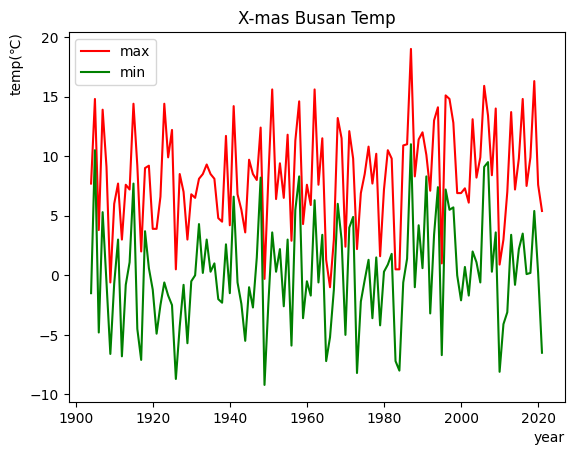

In [20]:
#크리스마스 데이터 그래프
plt.title('X-mas Busan Temp')
plt.plot(xmas_df['년'], xmas_df['최고기온'], color = 'red', label = 'max') #plt.plot(x축, y축, 색상, 그래프이름)
plt.plot(xmas_df['년'], xmas_df['최저기온'], color = 'green', label = 'min')
plt.xlabel('year', loc = 'right')
plt.ylabel('temp(℃)', loc = 'top')
plt.legend()

## 4.월별 기온 데이터 : boxplot

In [21]:
avg_month = []

for i in range(1, 13):
    avg_month.append(df.loc[df['월'] == i, '평균기온'])

In [22]:
avg_month

[267      2.2
 268      5.8
 269      7.0
 270      7.9
 271      8.7
         ... 
 43027    6.3
 43028    4.7
 43029    3.3
 43030    3.2
 43031    3.6
 Name: 평균기온, Length: 3658, dtype: float64,
 298      4.7
 299      4.3
 300      5.3
 301      3.3
 302      1.7
         ... 
 43055    1.6
 43056    5.0
 43057    7.7
 43058    6.7
 43059    9.8
 Name: 평균기온, Length: 3332, dtype: float64,
 326       3.3
 327       6.4
 328       5.0
 329       1.7
 330       0.3
          ... 
 43086    13.8
 43087     9.6
 43088    11.5
 43089    14.0
 43090    11.5
 Name: 평균기온, Length: 3658, dtype: float64,
 0        11.3
 1         9.3
 3        11.3
 4        14.5
 5         9.4
          ... 
 43116    17.4
 43117    16.5
 43118    15.9
 43119    11.2
 43120    13.4
 Name: 평균기온, Length: 3556, dtype: float64,
 22       13.7
 23       15.9
 24       13.6
 25       16.6
 26       13.9
          ... 
 43147    22.4
 43148    22.6
 43149    22.6
 43150    20.7
 43151    21.6
 Name: 평균기온, Length: 3686

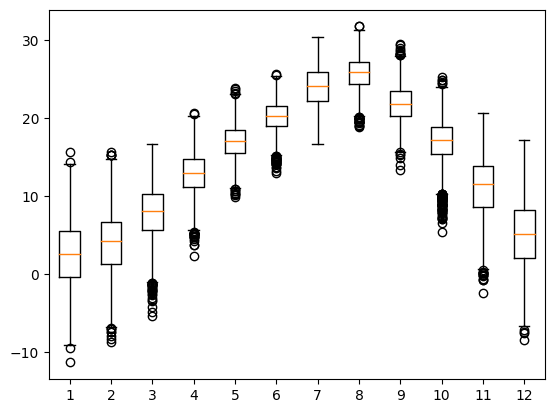

In [23]:
plt.boxplot(avg_month)
plt.show()